**In this first cell, we list the most recent versions/most used versions of our functions. They allow for our algoirthms to run on a graph in Universe A or a Universe B (the complement). In all other cells, we have focussed on algorithms taking the perspective of taking a Universe B graph as an argument as this was most adventageous at first.**

In [ ]:
"""
Pseudo Code for twinQ_AB():
1. Determine all pairs of vertices.

Loop through the pairs:
2. Determine neighbors of each vertex in the pair.
3. Return the pair of twins found:
    3a. If doing in Universe B, look for two nonadjacent vertices with same neighborhood.
    3b. If doing in Universe A, look for two adjacent vertices with the same neighborhood.
4. Return (twin1, twin2)"""

"""twinQ_AB(Graph, co_twin=True): return two non-adjacent vertices that have the same neighborhood, if there are any, else return []
   twinQ_AB(Graph, co_twin=False): return two adjacent vertices that have the same neighborhood, if there are any, else return []"""
   
"""Input: (Graph, co_twin boolean) Output: Tuple of twins or [] if none"""
def twinQ_AB(graph, co_twin=True):
    if co_twin == True:
        s = Subsets(graph.vertices(sort=False), 2)
        for vertex_pairs in s:
            neighbors1 = graph.neighbors(vertex_pairs[0])
            neighbors2 = graph.neighbors(vertex_pairs[1])
            #print(vertex_pairs, neighbors1, neighbors2)
            # below taken from online since it has O(n) storage and complexity
            if len(neighbors1) == len(neighbors2) and len(neighbors1) == sum([1 for i, j in zip(neighbors1, neighbors2) if i == j]):
                return vertex_pairs[0],vertex_pairs[1] # returning a tuple since the twins of this graph are static and will not change
        return []
    else:
        s = Subsets(graph.vertices(sort=False), 2)
        for vertex_pairs in s:
            neighbors1 = graph.neighbors(vertex_pairs[0])
            neighbors1.append(vertex_pairs[0])
            neighbors1.sort()
            neighbors2 = graph.neighbors(vertex_pairs[1])
            neighbors2.append(vertex_pairs[1])
            neighbors2.sort()
            #print(vertex_pairs, neighbors1, neighbors2)
            # below taken from online since it has O(n) storage and complexity
            if len(neighbors1) == len(neighbors2) and len(neighbors1) == sum([1 for i, j in zip(neighbors1, neighbors2) if i == j]):
                return vertex_pairs[0],vertex_pairs[1] # returning a tuple since the twins of this graph are static and will not change
        return []
    
"""part(Graph_list): return a partition of graphs in g into two parts: with twins and without"""
"""Input: list of Graph objects Output: Partitioned List of lists - first entry is a list of tuples (Graph, (twin1, twin2)), second entry is a list of graphs"""
def part_AB(Graph_List, co_twin=True):
    partition = [[],[]]
    for graph in Graph_List:
        t = twinQ_AB(graph, co_twin)
        
        if t == []:
            partition[1].append(graph)
            # partition0.append[0]
        else:
            partition[0].append((graph, t))
            # partition1.append[1]
    return partition

"""simplicial_vert_Q: Search through all the vertices of the graph looking for which vertices are simplicial in the complement, also known as co-simplicial. 
    We take this co-simplicial viewpoint because we have generally been working in Universe B (complement of our graphs). Thus, we find co-simplicial vertices of
    the graphs provided, which translate into simplicial vertices of the graph class in Universe A.
    
    If co_simplicial == True, look in the complement, also known as co-simplicial.  (Used, more often, for Universe B input graphs.)
    If co_simplicial == False, look in the given graph. (Used for Universe A input graphs.)"""
    
"""Input: (Graph, co_simplicial=True)) Output: [List of simplicial vertices in the complement (Universe A) with its neighbors that induce a clique]
   Input: (Graph, co_simplicial=False)) Output: [List of simplicial vertices in the given graph with its neighbors that induce a clique]"""
def simplicial_vert_Q_AB(graph, co_simplicial=True):
    simplicial_list = []
    
    if co_simplicial == True:
        graph_complement = graph.complement()
        for vertex in graph_complement.vertices(sort=False):
            neighbors = graph_complement.neighbors(vertex)
            if graph_complement.is_clique(neighbors, induced=True):
                simplicial_list.append((vertex, neighbors))
    else:
        for vertex in graph.vertices(sort=False):
            neighbors = graph.neighbors(vertex)
            if graph.is_clique(neighbors, induced=True):
                simplicial_list.append((vertex, neighbors))
    return simplicial_list

"""Extension: add a new vertex v to G, and join v to G in all possible ways. Then, we output all the ones that are f-free. 
   We perform a specific type of G-add depending on the argument Type_of_extension. If the G-add of type specified has an induced forbidden graph,
   we record which graph was induced. We return the Forbidden_List-free graphs as a list in a tuple with the dictionary of seen graphs in Forbidden_List."""
"""Input: (Graph, Forbidden_List, Type_of_extension: integer in [0,1,2,3]) Output: Tuple (Set of seen forbidden graphs, [List of resulting graphs - new vertex but f-free])"""
def ext_case_analysis_types(G, Forbidden_List, Type_of_extension):
    assert Type_of_extension in [0,1,2,3], " 'Argument Type_of_extension' must be an integer '0: Avoid isolated vertices', '1: Avoid all edges', '2: Avoid isolated vertices and all edges', '3: Allow isolated vertices and all edges'."
        # ["Avoid no edges", "Avoid all edges", "Avoid no edges and all edges, aka maintain doubly connected", "Allow no edges and all edges"], \
        # " 'Argument Type_of_extension' must be one of 'Avoid no edges', 'Avoid all edges', 'Avoid no edges and all egdes', 'Allow no edges and all edges'."
    
    n = G.order() + 1
    edge_pairs = []
    new_graphs = [G]
    forbidden_graphs_seen = dict()
        
    for vert in G.vertices(sort=False):
        edge_pairs.append ((vert, n))
    s = Subsets(edge_pairs) #here subsets are Sets
   
    if Type_of_extension == 0:
        edge_options_to_consider = s[1:]
    if Type_of_extension == 1:
        edge_options_to_consider = s[1:-1]
         # Next 5 Lines are where we allow for isolated vertices or not. This is the way of adding a vertex and no edges...
        extended_graph = G.copy()
        extended_graph.add_vertex(n)
        if subgQ(extended_graph, Forbidden_List) == None:
            new_graphs.append(extended_graph)
            extended_graph.name(G.name() + " ext")
            
    if Type_of_extension == 2:
        edge_options_to_consider = s[1:-1]
    if Type_of_extension == 3:
        edge_options_to_consider = s[1:]
         # Next 5 Lines are where we allow for isolated vertices or not. This is the way of adding a vertex and no edges...
        extended_graph = G.copy()
        extended_graph.add_vertex(n)
        if subgQ(extended_graph, Forbidden_List) == None:
            new_graphs.append(extended_graph)
            extended_graph.name(G.name() + " ext")
     
    for sets_of_edge_options in edge_options_to_consider: # Block above shows what we are allowing and what type of edges we are not...
        extended_graph = G.copy()
        extended_graph.name(G.name() + " ext")
        extended_graph.add_edges(sets_of_edge_options)
        list_or_name_string = new_graphs_list_forbidden(extended_graph, Forbidden_List, new_graphs)
        if type(list_or_name_string) == str:
            if list_or_name_string in forbidden_graphs_seen:
                forbidden_graphs_seen[list_or_name_string] += 1
            else: 
                forbidden_graphs_seen[list_or_name_string] = 1
            #print(list_or_name_string, sets_of_edge_options) USE IF YOU WANT TO SEE THE EDGES THAT GIVE THE FORBIDDEN
            # print("\n\n\n\n\nNew set of New Graphs")
            # for graph in new_graphs:
            #     graph.show()
            # print("\n\n\n\n")
    new_graphs.pop(0)
    return forbidden_graphs_seen, new_graphs

"""Augmentation with seen forbidden graphs: add new vertices v such that v is adjacent to x, v is not adjacent to y, and v is adjacent to all other vertices in all possible ways"""
"""Input: (Graph, Forbidden_List, twin vertex 1, twin vertex 2) Output: Tuple (Set of seen forbidden graphs, [List of resulting graphs - new vertex and twin free])"""
def aug_case_analysis(G, Forbidden_List, x, y):
    n = G.order() + 1
    edge_pairs = []
    new_graphs = [G]
    forbidden_graphs_seen = dict()
    vertices_G = G.vertices(sort=False)
    vertices_G.remove(x)
    vertices_G.remove(y)
    for vert in vertices_G:
        edge_pairs.append((vert, n))
    s = subsets(edge_pairs) #here subsets are lists
    
    for sets_of_edge_options in s: # No -1 want to allow for new vertex to be adjacent to all verts including x but not y
        extended_graph = G.copy()
        extended_graph.name(G.name() + " aug")
        sets_of_edge_options.append((x,n)) #add the necessary (x,n) edge and not the (y,n) edge ### Should be able to move above the loop...
        extended_graph.add_edges(sets_of_edge_options)
        list_or_name_string = new_graphs_list_forbidden(extended_graph, Forbidden_List, new_graphs)
        if type(list_or_name_string) == str:
            if list_or_name_string in forbidden_graphs_seen:
                forbidden_graphs_seen[list_or_name_string] += 1
            else: 
                forbidden_graphs_seen[list_or_name_string] = 1
    new_graphs.pop(0)
    return forbidden_graphs_seen, new_graphs

# This function differs from previous generate functions because it allows for the generation to be in Universe A or Universe B and allows for any -add operation in either universe.
"""Generates all graphs through ext and aug up to order (order_to_stop_at + 1) - returns tuple (set of seen forbidden graphs, list of only the prime graphs)"""
"""Input: (List of the starting graph, integer of one less than order desired, list of the forbidden subgraphs, LOOKING FOR COTWINS/TWINS: T/F, TYPE OF EXTENSION: INTEGER IN [0,1,2,3]), 
   Output: (set of seen forbidden graphs, List of prime graphs through ext and aug of order order_to_stop_at + 1)"""
def generate_all_graphs_analysis_AB(starting_graph_list, order_to_stop_at, Forbidden_List, co_twin, ext_type):
    seen_forbidden_graph_set = set()

    for graph in starting_graph_list: 
        if graph.order() > order_to_stop_at:
            break
        twins = twinQ_AB(graph, co_twin)
        if twins != []:
            augmented_graphs = aug_case_analysis(graph, Forbidden_List, twins[0], twins[1])
            seen_forbidden_graph_set = seen_forbidden_graph_set.union(augmented_graphs[0])
            for aug_graph in augmented_graphs[1]:
                add_nonisomorphic_graph_to_list(aug_graph,starting_graph_list)
        else:
            extended_graphs = ext_case_analysis_types(graph, Forbidden_List, ext_type)
            seen_forbidden_graph_set = seen_forbidden_graph_set.union(extended_graphs[0])
            for ext_graph in extended_graphs[1]:
                add_nonisomorphic_graph_to_list(ext_graph,starting_graph_list)
    starting_graph_list.pop(0)
    partition = part_AB(starting_graph_list, co_twin)
    prime_keepers = partition[1]

    return seen_forbidden_graph_set, prime_keepers

# This function differs from the preceding generate function due to one change. It returns ALL graphs produced that are Forbidden_List-free; they are partitioned into two: 
# those that contain twins/cotwins and those that are prime/coprime.
"""Generates all graphs through ext and aug up to order (order_to_stop_at + 1)
   Returns tuple (set of seen forbidden graphs, list of [tuples of nonprime/noncoprime graphs with their twins/cotwins] and [prime graphs] )"""
"""Input: (List of the starting graph, integer of one less than order desired, list of the forbidden subgraphs, LOOKING FOR COTWINS/TWINS: T/F, TYPE OF EXTENSION: INTEGER IN [0,1,2,3]), 
   Output: (set of seen forbidden graphs, List of graphs through ext and aug of order order_to_stop_at + 1 that are partitioned into nonprime/noncoprime and those that are prime)"""
def generate_all_graphs_analysis_AB_all_graphs(starting_graph_list, order_to_stop_at, Forbidden_List, co_twin, ext_type):
    seen_forbidden_graph_set = set()

    for graph in starting_graph_list: 
        if graph.order() > order_to_stop_at:
            break
        twins = twinQ_AB(graph, co_twin)
        if twins != []:
            augmented_graphs = aug_case_analysis(graph, Forbidden_List, twins[0], twins[1])
            seen_forbidden_graph_set = seen_forbidden_graph_set.union(augmented_graphs[0])
            for aug_graph in augmented_graphs[1]:
                add_nonisomorphic_graph_to_list(aug_graph,starting_graph_list)
        else:
            extended_graphs = ext_case_analysis_types(graph, Forbidden_List, ext_type)
            seen_forbidden_graph_set = seen_forbidden_graph_set.union(extended_graphs[0])
            for ext_graph in extended_graphs[1]:
                add_nonisomorphic_graph_to_list(ext_graph,starting_graph_list)
    starting_graph_list.pop(0)
    partition = part_AB(starting_graph_list, co_twin)

    return seen_forbidden_graph_set, partition

**The cells that follow have functions listed in the order in which they were written. This 'subgQ()' is the first function that was written for this project.**

In [ ]:
"""Helper Methods"""

"""
SageMath provides:
subgraph_search(G) - Return a copy of G in self.
is_subgraph() - Check whether self is a subgraph of other.
subgraph() - Return the subgraph containing the given vertices and edges.
"""

"""Does G contain any graph in Subgraphs_List as an induced subgraph?"""
"""Input: (Graph, List to check if induced subgraph of Graph) Output: None if no subgraphs of list found in G, otherwise return the subgraph of G itself)"""
def subgQ(G, Subgraphs_List):
    for h in Subgraphs_List:
        returned_graph_or_none = G.subgraph_search(h, induced=True)
        if returned_graph_or_none != None:
            return returned_graph_or_none
    return None

"""Extension: add a new vertex v to G, and join v to G in all possible ways. Then, we output all the ones that are f-free"""
"""Input: (Graph, Forbidden_List) Output: [List of resulting graphs - new vertex but f-free]"""
def ext(G, Forbidden_List):
    n = G.order() + 1
    edge_pairs = []
    new_graphs = [G]
    extended_graph = G.copy()
    extended_graph.add_vertex(n)
    if subgQ(extended_graph, Forbidden_List) == None:
        new_graphs.append(extended_graph)
    for vert in G.vertices(sort=False):
        edge_pairs.append ((vert, n))
    s = Subsets(edge_pairs) #here subsets are Sets
    for sets_of_edge_options in s[:-1]: # -1 don't want to allow for new vertex to be adjacent to all others in the complement
        extended_graph = G.copy()
        extended_graph.add_edges(sets_of_edge_options)
        new_graphs_list(extended_graph, Forbidden_List, new_graphs)
    new_graphs.pop(0)
    return new_graphs

"""Augmentation: add new vertices v such that v is adjacent to x, v is not adjacent to y, and v is adjacent to all otehr vertices in all possible ways"""
"""Input: (Graph, Forbidden_List, twin vertex 1, twin vertex 2) Output: [List of resulting graphs - new vertex and twin free]"""
def aug(G, Forbidden_List, x, y):
    n = G.order() + 1
    edge_pairs = []
    new_graphs = [G]
    vertices_G = G.vertices(sort=False)
    vertices_G.remove(x)
    vertices_G.remove(y)
    for vert in vertices_G:
        edge_pairs.append((vert, n))
    s = subsets(edge_pairs) #here subsets are lists
    for sets_of_edge_options in s: # No -1 want to allow for new vertex to be adjacent to all verts including x but not y
        sets_of_edge_options.append((x,n)) #add the necessary (x,n) edge and not the (y,n) edge
        extended_graph = G.copy()
        extended_graph.add_edges(sets_of_edge_options)
        new_graphs_list(extended_graph, Forbidden_List, new_graphs)
    new_graphs.pop(0)
    return new_graphs

"""twinQ(Graph): return two non-adjacent vertices that have the same neighborhood, if there are any, else return {}"""
"""Input: Graph Output: Tuple of twins or [] if none"""
def twinQ(Graph):
    s = Subsets(Graph.vertices(sort=False), 2)
    for vertex_pairs in s:
        neighbors1 = Graph.neighbors(vertex_pairs[0])
        neighbors2 = Graph.neighbors(vertex_pairs[1])

        if len(neighbors1) == len(neighbors2) and len(neighbors1) == sum([1 for i, j in zip(neighbors1, neighbors2) if i == j]):
            return vertex_pairs[0],vertex_pairs[1] # returning a tuple since the twins of this graph are static and will not change
    return []

"""part(Graph_list): return a partition of graphs in g into two parts: with twins and without"""
"""Input: list of Graph objects Output: Partitioned List of lists - first entry is a list of tuples (Graph, (twin1, twin2)), second entry is a list of graphs"""
"""Output: [ [Graph object, tuple of twins], [Graph objects with no twins] ]"""
def part(Graph_List):
    partition = [[],[]]
    for graph in Graph_List:
        t = twinQ(graph)
        
        if t == []:
            partition[1].append(graph)
        else:
            partition[0].append((graph, t))
    return partition

"""Helper Function that will check if a graph is isomorphic to one in the list already...used in generate_all_graphs to help with checking if new f-free graphs generated by
aug() or ext() have already been added to the long master list of graphs to iterate through - this is the isomorphic check"""
"""Input: (Graph to check, list of forbidden graphs, the list of new_graphs to be maintained) Output: list with the added graph if no forbidden induced"""
def add_nonisomorphic_graph_to_list(Graph, new_graphs_list):
    flag_seen = 0
    for graph in new_graphs_list:
        if graph.is_isomorphic(Graph):
            flag_seen = 1
            break
    if flag_seen == 0:
        new_graphs_list.append(Graph)
    return new_graphs_list

"""Helper Function that will check if a graph has forbidden in it, then adds to list of new graphs if not already there...used in ext() and aug() - this is the forbidden and isomorphic check"""
"""Input: (Graph to check, list of forbidden graphs, the list of new_graphs to be maintained) Output: list with the added graph if no forbidden induced"""
def new_graphs_list(Graph, Forbidden_Graphs, new_graphs_list):
    if subgQ(Graph, Forbidden_Graphs) == None:
        flag_seen = 0
        for graph in new_graphs_list:
            if graph.is_isomorphic(Graph):
                flag_seen = 1
                break
        if flag_seen == 0:
            new_graphs_list.append(Graph)
    return new_graphs_list

"""Generates all graphs through ext and aug up to order (order_to_stop_at + 1). Returns a list of only the prime graphs generated."""
"""Input: (List of the starting graph, integer of one less than order desired, list of the forbidden subgraphs), 
   Output: List of prime graphs through ext and aug of order order_to_stop_at + 1"""
def generate_all_graphs(starting_graph_list, order_to_stop_at, Forbidden_List):
    for graph in starting_graph_list: 
        if graph.order() > order_to_stop_at:
            break
        twins = twinQ(graph)
        if twins != []:
            augmented_graphs = aug(graph, Forbidden_List, twins[0], twins[1])
            for aug_graph in augmented_graphs:
                add_nonisomorphic_graph_to_list(aug_graph,starting_graph_list)
        else:
            extended_graphs = ext(graph, Forbidden_List)
            for ext_graph in extended_graphs:
                add_nonisomorphic_graph_to_list(ext_graph,starting_graph_list)
    starting_graph_list.pop(0)
    partition = part(starting_graph_list)
    prime_keepers = partition[1]

    return prime_keepers

In [ ]:
"""Generates all graphs through ext and aug up to order (order_to_stop_at + 1) - returns tuple (set of seen forbidden graphs, list of only the prime graphs)"""
"""Input: (List of the starting graph, integer of one less than order desired, list of the forbidden subgraphs), 
   Output: (set of seen forbidden graphs, List of prime graphs through ext and aug of order order_to_stop_at + 1)"""
def generate_all_graphs_analysis(starting_graph_list, order_to_stop_at, Forbidden_List):
    seen_forbidden_graph_set = set()
    show_list_leading_up_to_end = []

    for graph in starting_graph_list: 
        show_list_leading_up_to_end.append(graph)
        if graph.order() > order_to_stop_at:
            break
        twins = twinQ(graph)
        if twins != []:
            augmented_graphs = aug_case_analysis(graph, Forbidden_List, twins[0], twins[1])
            seen_forbidden_graph_set = seen_forbidden_graph_set.union(augmented_graphs[0])
            for aug_graph in augmented_graphs[1]:
                add_nonisomorphic_graph_to_list(aug_graph,starting_graph_list)
        else:
            extended_graphs = ext_case_analysis(graph, Forbidden_List)
            seen_forbidden_graph_set = seen_forbidden_graph_set.union(extended_graphs[0])
            for ext_graph in extended_graphs[1]:
                add_nonisomorphic_graph_to_list(ext_graph,starting_graph_list)
    starting_graph_list.pop(0)
    partition = part(starting_graph_list)
    prime_keepers = partition[1]

    return seen_forbidden_graph_set, prime_keepers

"""Generates all graphs through ext and aug up to order (order_to_stop_at + 1), does not allow for adding isolated vert in ext - returns tuple (set of seen forbidden graphs, list of only the prime graphs)"""
"""Input: (List of the starting graph, integer of one less than order desired, list of the forbidden subgraphs), 
   Output: (set of seen forbidden graphs, List of prime graphs through ext and aug of order order_to_stop_at + 1)"""
def generate_all_graphs_analysis_connected(starting_graph_list, order_to_stop_at, Forbidden_List):
    seen_forbidden_graph_set = set()

    for graph in starting_graph_list: 
        if graph.order() > order_to_stop_at:
            break
        twins = twinQ(graph)
        if twins != []:
            augmented_graphs = aug_case_analysis(graph, Forbidden_List, twins[0], twins[1])
            seen_forbidden_graph_set = seen_forbidden_graph_set.union(augmented_graphs[0])
            for aug_graph in augmented_graphs[1]:
                add_nonisomorphic_graph_to_list(aug_graph,starting_graph_list)
        else:
            extended_graphs = ext_case_analysis_no_isolated_verts(graph, Forbidden_List)
            seen_forbidden_graph_set = seen_forbidden_graph_set.union(extended_graphs[0])
            for ext_graph in extended_graphs[1]:
                add_nonisomorphic_graph_to_list(ext_graph,starting_graph_list)
    starting_graph_list.pop(0)
    partition = part(starting_graph_list)
    prime_keepers = partition[1]

    return seen_forbidden_graph_set, prime_keepers

"""Generates all graphs through ext and aug up to order (order_to_stop_at + 1), does not allow for adding isolated vert in ext.
   Returns tuple (set of seen forbidden graphs, list of only the prime graphs)"""
"""Input: (List of the starting graph, integer of one less than order desired, list of the forbidden subgraphs), 
   Output: (set of seen forbidden graphs, List of prime graphs through ext and aug of order order_to_stop_at + 1)"""
def generate_all_graphs_analysis_connected_but_G_may_disconnect(starting_graph_list, order_to_stop_at, Forbidden_List):
    seen_forbidden_graph_set = set()

    for graph in starting_graph_list: 
        if graph.order() > order_to_stop_at:
            break
        twins = twinQ(graph)
        if twins != []:
            augmented_graphs = aug_case_analysis(graph, Forbidden_List, twins[0], twins[1])
            seen_forbidden_graph_set = seen_forbidden_graph_set.union(augmented_graphs[0])
            for aug_graph in augmented_graphs[1]:
                add_nonisomorphic_graph_to_list(aug_graph,starting_graph_list)
        else:
            extended_graphs = ext_case_analysis_no_isolated_verts_but_G_may_disconnect(graph, Forbidden_List)
            seen_forbidden_graph_set = seen_forbidden_graph_set.union(extended_graphs[0])
            for ext_graph in extended_graphs[1]:
                add_nonisomorphic_graph_to_list(ext_graph,starting_graph_list)
    starting_graph_list.pop(0)
    partition = part(starting_graph_list)
    prime_keepers = partition[1]

    return seen_forbidden_graph_set, prime_keepers

"""This is one form of mimicking Guoli's one step of graph produced at a time. Extra comments on its creation are found in the original .ipynb file."""

"""Generates all graphs through ext and aug up to order (order_to_stop_at + 1), does not allow for adding isolated vert in ext.
   Returns tuple (set of seen forbidden graphs, list of ALL graphs (prime and otherwise))"""
"""Input: (List of the starting graph, integer of one less than order desired, list of the forbidden subgraphs), 
   Output: (set of seen forbidden graphs, List of graphs through ext and aug of order order_to_stop_at + 1)"""
def generate_all_graphs_analysis_connected_stepbystep(starting_graph_list, order_to_stop_at, Forbidden_List):
    seen_forbidden_graph_set = set()
    starting_graph_list_copy_to_not_modify_input_list = starting_graph_list.copy()

    for graph in starting_graph_list: 
        if graph.order() > order_to_stop_at:
            break
        twins = twinQ(graph)
        if twins != []:
            augmented_graphs = aug_case_analysis(graph, Forbidden_List, twins[0], twins[1])
            seen_forbidden_graph_set = seen_forbidden_graph_set.union(augmented_graphs[0])
            for aug_graph in augmented_graphs[1]:
                add_nonisomorphic_graph_to_list(aug_graph,starting_graph_list_copy_to_not_modify_input_list)
        else:
            extended_graphs = ext_case_analysis_no_isolated_verts(graph, Forbidden_List)
            seen_forbidden_graph_set = seen_forbidden_graph_set.union(extended_graphs[0])
            for ext_graph in extended_graphs[1]:
                add_nonisomorphic_graph_to_list(ext_graph,starting_graph_list_copy_to_not_modify_input_list)

    return seen_forbidden_graph_set, starting_graph_list_copy_to_not_modify_input_list

"""Helper Function that will check if a graph has forbidden in it, then adds to list of new graphs if not already there...used in ext_case_analysis() and aug_case_analysis()"""
"""Input: (Graph to check, list of forbidden graphs, the list of new_graphs to be maintained) Output: returns string of forbidden graph Graph has or the list with the added graph if no forbidden induced"""
def new_graphs_list_forbidden(Graph_start, Forbidden_Graphs, new_graphs_list):
    Graph = subgQ(Graph_start, Forbidden_Graphs)
    if Graph == None:
        flag_seen = 0
        for graph in new_graphs_list:
            if graph.is_isomorphic(Graph_start):
                flag_seen = 1
                break
        if flag_seen == 0:
            new_graphs_list.append(Graph_start)
    else:
        for graph in Forbidden_Graphs:
            if graph.is_isomorphic(Graph):
                return graph.name()
    return new_graphs_list


"""Extension with seen forbidden graphs 1: add a new vertex v to G, and join v to G in all possible ways. Then, we output all the ones that are f-free"""
"""Input: (Graph, Forbidden_List) Output: Tuple (Set of seen forbidden graphs, [List of resulting graphs - new vertex but f-free])"""
def ext_case_analysis(G, Forbidden_List):
    n = G.order() + 1
    edge_pairs = []
    new_graphs = [G]
    forbidden_graphs_seen = dict()
    extended_graph = G.copy()
    extended_graph.add_vertex(n)
    if subgQ(extended_graph, Forbidden_List) == None:
        new_graphs.append(extended_graph)
        extended_graph.name(G.name() + " ext")
    for vert in G.vertices(sort=False):
        edge_pairs.append ((vert, n))
    s = Subsets(edge_pairs) #here subsets are Sets
    for sets_of_edge_options in s[:-1]: # -1 don't want to allow for new vertex to be adjacent to all others in the complement
        extended_graph = G.copy()
        extended_graph.name(G.name() + " ext")
        extended_graph.add_edges(sets_of_edge_options)
        list_or_name_string = new_graphs_list_forbidden(extended_graph, Forbidden_List, new_graphs)
        if type(list_or_name_string) == str:
            if list_or_name_string in forbidden_graphs_seen:
                forbidden_graphs_seen[list_or_name_string] += 1
            else: 
                forbidden_graphs_seen[list_or_name_string] = 1
    new_graphs.pop(0)
    return forbidden_graphs_seen, new_graphs


# The next few functions are adaptations for 'ext_case_analysis'. We note that these are all combined later into one function.

"""Extension with seen forbidden graphs 2: add a new vertex v to G, and join v to G in all possible ways, except where v is adjacent to all vertices of G or isolated. Then, we output all the ones that are f-free"""
"""Input: (Graph, Forbidden_List) Output: Tuple (Set of seen forbidden graphs, [List of resulting graphs - new vertex but f-free])"""
def ext_case_analysis_no_isolated_verts(G, Forbidden_List):
    n = G.order() + 1
    edge_pairs = []
    new_graphs = [G]
    forbidden_graphs_seen = dict()
    for vert in G.vertices(sort=False):
        edge_pairs.append ((vert, n))
    s = Subsets(edge_pairs) #here subsets are Sets
    for sets_of_edge_options in s[:-1]: # -1 don't want to allow for new vertex to be adjacent to all others in the complement
        extended_graph = G.copy()
        extended_graph.name(G.name() + " ext")
        extended_graph.add_edges(sets_of_edge_options)
        list_or_name_string = new_graphs_list_forbidden(extended_graph, Forbidden_List, new_graphs)
        if type(list_or_name_string) == str:
            if list_or_name_string in forbidden_graphs_seen:
                forbidden_graphs_seen[list_or_name_string] += 1
            else: 
                forbidden_graphs_seen[list_or_name_string] = 1
    new_graphs.pop(0)
    return forbidden_graphs_seen, new_graphs

"""Extension with seen forbidden graphs 3: add a new vertex v to G, and join v to G in all possible ways except where v is isolated. Then, we output all the ones that are f-free"""
"""Input: (Graph, Forbidden_List) Output: Tuple (Set of seen forbidden graphs, [List of resulting graphs - new vertex but f-free])"""
def ext_case_analysis_no_isolated_verts_but_G_may_disconnect(G, Forbidden_List):
    n = G.order() + 1
    edge_pairs = []
    new_graphs = [G]
    forbidden_graphs_seen = dict()
    for vert in G.vertices(sort=False):
        edge_pairs.append ((vert, n))
    s = Subsets(edge_pairs) #here subsets are Sets
    for sets_of_edge_options in s: # removed -1, we allow for new vertex to be adjacent to all others in the complement, therefore disconnecting it from all in G
        extended_graph = G.copy()
        extended_graph.name(G.name() + " ext")
        extended_graph.add_edges(sets_of_edge_options)
        list_or_name_string = new_graphs_list_forbidden(extended_graph, Forbidden_List, new_graphs)
        if type(list_or_name_string) == str:
            if list_or_name_string in forbidden_graphs_seen:
                forbidden_graphs_seen[list_or_name_string] += 1
            else: 
                forbidden_graphs_seen[list_or_name_string] = 1
    new_graphs.pop(0)
    return forbidden_graphs_seen, new_graphs

"""Extension with seen forbidden graphs 4: add a new vertex v to G, and join v to G in all possible ways. Then, we output all the ones that are f-free"""
"""Input: (Graph, Forbidden_List) Output: Tuple (Set of seen forbidden graphs, [List of resulting graphs - new vertex but f-free])"""
def ext_case_analysis_all_edges(G, Forbidden_List):
    n = G.order() + 1
    edge_pairs = []
    new_graphs = [G]
    forbidden_graphs_seen = dict()
    extended_graph = G.copy()
    extended_graph.add_vertex(n)
    if subgQ(extended_graph, Forbidden_List) == None:
        new_graphs.append(extended_graph)
        extended_graph.name(G.name() + " ext")
    for vert in G.vertices(sort=False):
        edge_pairs.append ((vert, n))
    s = Subsets(edge_pairs) #here subsets are Sets
    for sets_of_edge_options in s: 
        extended_graph = G.copy()
        extended_graph.name(G.name() + " ext")
        extended_graph.add_edges(sets_of_edge_options)
        list_or_name_string = new_graphs_list_forbidden(extended_graph, Forbidden_List, new_graphs)
        if type(list_or_name_string) == str:
            if list_or_name_string in forbidden_graphs_seen:
                forbidden_graphs_seen[list_or_name_string] += 1
            else: 
                forbidden_graphs_seen[list_or_name_string] = 1
    new_graphs.pop(0)
    return forbidden_graphs_seen, new_graphs

In our work, we wanted to create a method to test and verify that a graph was contained in the class of $B_{p,q,r}$ graphs. Below are a series of functions that do just that. (We use are definition of a $pqr$-graph to motivate the structure of each of the functions below.)

In [ ]:

#Taken from ask.sagemath.org:
def is_complete_bipartite(p):
    return p.is_bipartite() and p.num_edges() == mul(map(len, p.bipartite_sets()))

from sage.graphs.connectivity import connected_components_subgraphs

"""Returns True if fits conjecture, False otherwise --- Conjecture of having induced g4 and no g1 g3 g5 g6"""
def conjecture_check(graph):
    conjecture_1 = Graph({1:[2], 2:[3,4], 3:[5], 4:[6], 5:[6]}) # this is pentagon with pendant edge
    connected_components_graphs = connected_components_subgraphs(graph)
    for component in connected_components_graphs:
        r = matching_in_complement(component)
        if component.is_subgraph(conjecture_1, induced=True,up_to_isomorphism=True):
            pass 
        elif r != False:
            if component.order()%2 == 0 and r == component.order()/2:
                pass
            elif component.order()%2 == 0 and r == (component.order()/2) - 1:
                pass
            elif component.order()%2 == 1 and r == (component.order()-1)/2:
                pass
            else:
                return False
        else:
            return False
    return True

"""Prints the labels of what each component fits"""
"""It does falsely say that the graph fits the conjecture if the graph has TWINS. So be careful. Should build in twin checker..."""
def conjecture_check_labels(graph):
    conjecture_1 = Graph({1:[2], 2:[3,4], 3:[5], 4:[6], 5:[6]})
    connected_components_graphs = connected_components_subgraphs(graph)
    labels = []
    for component in connected_components_graphs:
        r = matching_in_complement(component)
        if component.is_subgraph(conjecture_1, induced=True,up_to_isomorphism=True):
            labels.append("Pentagon")  
        elif r != False:
            if component.order()%2 == 0 and r == component.order()/2:
                labels.append("B" + str(r) + str(r) + str(r))
            # This case will let through if duplication of vertex not in matching of B_p+1,p,p
            elif component.order()%2 == 0 and r == (component.order()/2) - 1:
                labels.append("B" + str(r+1) + str(r+1) + str(r))
            elif component.order()%2 == 1 and r == (component.order()-1)/2:
                labels.append("B" + str(r+1) + str(r) + str(r))
            else:
                labels.append("Does not fit conjecture")
        else:
            labels.append("Does not fit conjecture")
    return labels
    
"""Input a graph, it will check if the graph is bipartite. If not, return False. If so, return the size of a largest matching on the complement
that does not use an edge of the complete subgraphs given by the bipartition sets."""
def matching_in_complement(graph):
    complement_copy = graph.copy().complement()
    bipartite = graph.is_bipartite(certificate=True)
    if bipartite[0] == False:
        print('Not bipartite')
        return False
    else:
        # Sorts the vertices into their bipartition
        X = []
        Y = []
        for item in bipartite[1]:
            if bipartite[1][item] == 0:
                X.append(item)
            elif bipartite[1][item] == 1:
                Y.append(item)
        # print(X, Y)
        # print(graph.subgraph(X).complement().edges(X, sort=False,labels=False))
        # print(graph.subgraph(Y).complement().edges(Y, sort=False,labels=False))
        X_complete_complement_edges = graph.subgraph(X).complement().edges(X, sort=False,labels=False)
        Y_complete_complement_edges = graph.subgraph(Y).complement().edges(Y, sort=False,labels=False)
        complement_copy.delete_edges(X_complete_complement_edges)
        complement_copy.delete_edges(Y_complete_complement_edges)
        # complement_copy.show(figsize=2.5)
        if len(complement_copy.edges(sort=False)) != len(complement_copy.matching()):
            print('Graph complement contains a matching but is not a matching')
            return False
        return complement_copy.matching(value_only=True)

My advisor actively works in Mathematica as I do all my computations in SageMath via VSCode. He often stated that his algorithm/computations would take longer than mine. I coded his same algorithm in SageMath in order to compare the computation time. Our tests (just between Mathematica on his machine versus SageMath on mine) consistently showed that the SageMath computations were significantly faster. We wanted to see if we could figure out why. At this time, we are not sure why there is such a difference in performance time. The code below was written to explore this question.

In [ ]:
def subgraph_method_guoli(induced_graph, graph):
    subsets_of_size_k = Subsets(graph.vertices(sort=False),induced_graph.order())
    for set in subsets_of_size_k:
        if graph.subgraph(vertices=set).is_isomorphic(induced_graph):
            return True
    return False

"""Does G contain any graph in Subgraphs_List as an induced subgraph?"""
"""Input: (Graph, List to check if induced subgraph of Graph) Output: False if no subgraphs of list found in G, otherwise return the empty string)"""
def guoli_subgQ(G, Subgraphs_List):
    for h in Subgraphs_List:
        returned_graph_or_none = subgraph_method_guoli(h, G)
        if returned_graph_or_none != False:
            return ""
    return None


"""Generates all graphs through ext and aug up to order (order_to_stop_at + 1). It does not allow for adding isolated vertices in ext algorithm. The functions returns a tuple (set of seen forbidden graphs, list of ALL graphs (prime and otherwise))."""
"""Input: (List of the starting graph, integer of one less than order desired, list of the forbidden subgraphs), 
   Output: (set of seen forbidden graphs, List of graphs through ext and aug of order order_to_stop_at + 1)"""
def guoli_generate_all_graphs_analysis_connected_stepbystep(starting_graph_list, order_to_stop_at, Forbidden_List):
    seen_forbidden_graph_set = set()
    starting_graph_list_copy_to_not_modify_input_list = starting_graph_list.copy()

    for graph in starting_graph_list_copy_to_not_modify_input_list: 
        if graph.order() > order_to_stop_at:
            break
        twins = twinQ(graph)
        if twins != []:
            augmented_graphs = aug_case_analysis(graph, Forbidden_List, twins[0], twins[1])
            seen_forbidden_graph_set = seen_forbidden_graph_set.union(augmented_graphs[0])
            for aug_graph in augmented_graphs[1]:
                add_nonisomorphic_graph_to_list(aug_graph,starting_graph_list_copy_to_not_modify_input_list)
        else:
            extended_graphs = ext_case_analysis_no_isolated_verts(graph, Forbidden_List)
            seen_forbidden_graph_set = seen_forbidden_graph_set.union(extended_graphs[0])
            for ext_graph in extended_graphs[1]:
                add_nonisomorphic_graph_to_list(ext_graph,starting_graph_list_copy_to_not_modify_input_list)

    return seen_forbidden_graph_set, starting_graph_list_copy_to_not_modify_input_list

Now, we hardcode define the graphs that will be of particular interest in our research. This is done for convenience of notation.

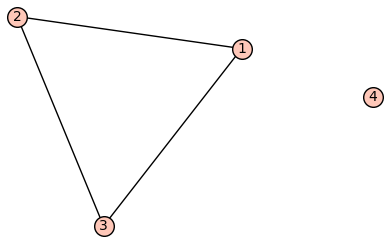

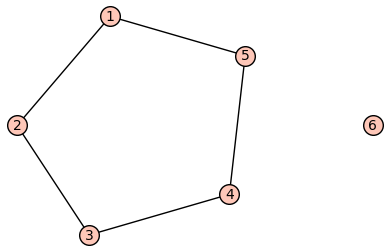

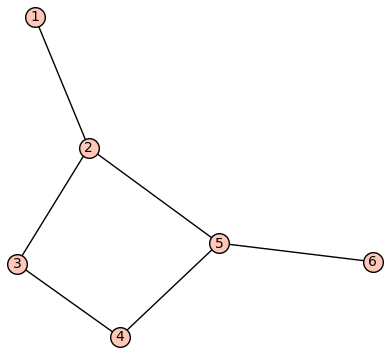

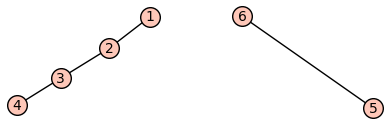

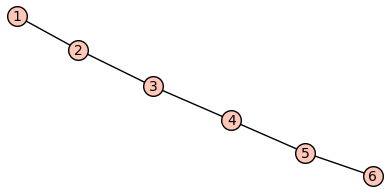

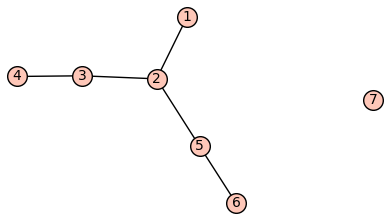

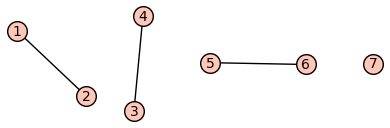

In [5]:
g1 =  Graph({1:[2,3],2:[3],4:[]}); g1.name("g1"); g1.show()
g2 =  Graph({1:[2,5],2:[3],3:[4],4:[5], 6:[]}); g2.name("g2"); g2.show()
g3 = Graph({1:[2],2:[3,5],3:[4],4:[5], 5:[6]}); g3.name("g3"); g3.show()
g4 = Graph({1:[2],2:[3],3:[4], 5:[6]}); g4.name("g4"); g4.show()
g5 = Graph({1:[2],2:[3],3:[4], 4:[5], 5:[6]}); g5.name("g5"); g5.show()
g6 = Graph({1:[2],2:[3,5],3:[4],5:[6], 7:[]}); g6.name("g6"); g6.show()
g7 = Graph({1:[2],3:[4],5:[6],7:[]}); g7.name("g7"); g7.show()

In [2]:
"""Graphs Saved for Computation or Convenience"""

c_5 = Graph({1:[2,5], 2:[3], 3:[4], 4:[5]}); c_5.name("C_5")
k_1 = Graph({1:[]}); k_1.name("K_1")
k_3 = Graph({1:[2,3], 2:[3]}); k_3.name("K_3")
s_122 = Graph({1:[2,4,6],2:[3], 4:[5]}); s_122.name("S_122")

p3 = Graph({1:[2],2:[3]}); p3.name('P_3')
p4 = Graph({1:[2],2:[3],3:[4]}); p4.name('P_4')
p7 = Graph({1:[2], 2:[3], 3:[4], 4:[5], 5:[6], 6:[7]}); p7.name('P_7')
p8 = Graph({1:[2], 2:[3], 3:[4], 4:[5], 5:[6], 6:[7], 7:[8]}); p8.name('P_8')
p9 = Graph({1:[2], 2:[3], 3:[4], 4:[5], 5:[6], 6:[7], 7:[8], 8:[9]}); p9.name('P_9')
p10 = Graph({1:[2], 2:[3], 3:[4], 4:[5], 5:[6], 6:[7], 7:[8], 8:[9], 9:[10]}); p10.name('P_10') 

c7 = Graph({1:[2,7], 2:[3], 3:[4], 4:[5], 5:[6], 6:[7]}); c7.name('C_7')
c8 = Graph({1:[2,8], 2:[3], 3:[4], 4:[5], 5:[6], 6:[7], 7:[8]}); c8.name('C_8')
c9 = Graph({1:[2,9], 2:[3], 3:[4], 4:[5], 5:[6], 6:[7], 7:[8], 8:[9]}); c9.name('C_9')
c10 = Graph({1:[2,10], 2:[3], 3:[4], 4:[5], 5:[6], 6:[7], 7:[8], 8:[9], 9:[10]}); c10.name('C_10') 

"""Base 32 Graphs for 136-free --- Case \bar{G} is J_5 free:"""
base_case_136_free_barG_J5_free_graph_0 = Graph("FhCH?"); base_case_136_free_barG_J5_free_graph_0.name("base_case_136_free_barG_J5_free_graph_0")
base_case_136_free_barG_J5_free_graph_1 = Graph("FhCK_"); base_case_136_free_barG_J5_free_graph_1.name("base_case_136_free_barG_J5_free_graph_1")
base_case_136_free_barG_J5_free_graph_2 = Graph("FhCKO"); base_case_136_free_barG_J5_free_graph_2.name("base_case_136_free_barG_J5_free_graph_2")
base_case_136_free_barG_J5_free_graph_3 = Graph("FhCIO"); base_case_136_free_barG_J5_free_graph_3.name("base_case_136_free_barG_J5_free_graph_3")
base_case_136_free_barG_J5_free_graph_4 = Graph("GhCK@?"); base_case_136_free_barG_J5_free_graph_4.name("base_case_136_free_barG_J5_free_graph_4")
base_case_136_free_barG_J5_free_graph_5 = Graph("GhCKCO"); base_case_136_free_barG_J5_free_graph_5.name("base_case_136_free_barG_J5_free_graph_5")
base_case_136_free_barG_J5_free_graph_6 = Graph("GhCKCG"); base_case_136_free_barG_J5_free_graph_6.name("base_case_136_free_barG_J5_free_graph_6")
base_case_136_free_barG_J5_free_graph_7 = Graph("GhCKAG"); base_case_136_free_barG_J5_free_graph_7.name("base_case_136_free_barG_J5_free_graph_7")
base_case_136_free_barG_J5_free_graph_8 = Graph("GhCK@G"); base_case_136_free_barG_J5_free_graph_8.name("base_case_136_free_barG_J5_free_graph_8")
base_case_136_free_barG_J5_free_graph_9 = Graph("GhCK@K"); base_case_136_free_barG_J5_free_graph_9.name("base_case_136_free_barG_J5_free_graph_9")
base_case_136_free_barG_J5_free_graph_10 = Graph("GhCHC_"); base_case_136_free_barG_J5_free_graph_10.name("base_case_136_free_barG_J5_free_graph_10")
base_case_136_free_barG_J5_free_graph_11 = Graph("GhCHAO"); base_case_136_free_barG_J5_free_graph_11.name("base_case_136_free_barG_J5_free_graph_11")
base_case_136_free_barG_J5_free_graph_12 = Graph("GhCHAG"); base_case_136_free_barG_J5_free_graph_12.name("base_case_136_free_barG_J5_free_graph_12")
base_case_136_free_barG_J5_free_graph_13 = Graph("GhCH@G"); base_case_136_free_barG_J5_free_graph_13.name("base_case_136_free_barG_J5_free_graph_13")
base_case_136_free_barG_J5_free_graph_14 = Graph("GhCHCS"); base_case_136_free_barG_J5_free_graph_14.name("base_case_136_free_barG_J5_free_graph_14")
base_case_136_free_barG_J5_free_graph_15 = Graph("GhCHCK"); base_case_136_free_barG_J5_free_graph_15.name("base_case_136_free_barG_J5_free_graph_15")
base_case_136_free_barG_J5_free_graph_16 = Graph("GhCKQG"); base_case_136_free_barG_J5_free_graph_16.name("base_case_136_free_barG_J5_free_graph_16")
base_case_136_free_barG_J5_free_graph_17 = Graph("HhCK@AG"); base_case_136_free_barG_J5_free_graph_17.name("base_case_136_free_barG_J5_free_graph_17")
base_case_136_free_barG_J5_free_graph_18 = Graph("HhCK@AC"); base_case_136_free_barG_J5_free_graph_18.name("base_case_136_free_barG_J5_free_graph_18")
base_case_136_free_barG_J5_free_graph_19 = Graph("HhCK@?c"); base_case_136_free_barG_J5_free_graph_19.name("base_case_136_free_barG_J5_free_graph_19")
base_case_136_free_barG_J5_free_graph_20 = Graph("HhCK@AH"); base_case_136_free_barG_J5_free_graph_20.name("base_case_136_free_barG_J5_free_graph_20")
base_case_136_free_barG_J5_free_graph_21 = Graph("HhCK@?e"); base_case_136_free_barG_J5_free_graph_21.name("base_case_136_free_barG_J5_free_graph_21")
base_case_136_free_barG_J5_free_graph_22 = Graph("HhCK@?F"); base_case_136_free_barG_J5_free_graph_22.name("base_case_136_free_barG_J5_free_graph_22")
base_case_136_free_barG_J5_free_graph_23 = Graph("HhCK?Gb"); base_case_136_free_barG_J5_free_graph_23.name("base_case_136_free_barG_J5_free_graph_23")
base_case_136_free_barG_J5_free_graph_24 = Graph("HhCKCOc"); base_case_136_free_barG_J5_free_graph_24.name("base_case_136_free_barG_J5_free_graph_24")
base_case_136_free_barG_J5_free_graph_25 = Graph("HhCKCOe"); base_case_136_free_barG_J5_free_graph_25.name("base_case_136_free_barG_J5_free_graph_25")
base_case_136_free_barG_J5_free_graph_26 = Graph("HhCKAGe"); base_case_136_free_barG_J5_free_graph_26.name("base_case_136_free_barG_J5_free_graph_26")
base_case_136_free_barG_J5_free_graph_27 = Graph("HhCK@Ga"); base_case_136_free_barG_J5_free_graph_27.name("base_case_136_free_barG_J5_free_graph_27")
base_case_136_free_barG_J5_free_graph_28 = Graph("HhCHCaE"); base_case_136_free_barG_J5_free_graph_28.name("base_case_136_free_barG_J5_free_graph_28")
base_case_136_free_barG_J5_free_graph_29 = Graph("IhCK@AG@o"); base_case_136_free_barG_J5_free_graph_29.name("base_case_136_free_barG_J5_free_graph_29")
base_case_136_free_barG_J5_free_graph_30 = Graph("IhCK@?cG_"); base_case_136_free_barG_J5_free_graph_30.name("base_case_136_free_barG_J5_free_graph_30")
base_case_136_free_barG_J5_free_graph_31 = Graph("IhCK@AH@o"); base_case_136_free_barG_J5_free_graph_31.name("base_case_136_free_barG_J5_free_graph_31")

base_32_graphs = [base_case_136_free_barG_J5_free_graph_0,
base_case_136_free_barG_J5_free_graph_1,
base_case_136_free_barG_J5_free_graph_2,
base_case_136_free_barG_J5_free_graph_3,
base_case_136_free_barG_J5_free_graph_4,
base_case_136_free_barG_J5_free_graph_5,
base_case_136_free_barG_J5_free_graph_6,
base_case_136_free_barG_J5_free_graph_7,
base_case_136_free_barG_J5_free_graph_8,
base_case_136_free_barG_J5_free_graph_9,
base_case_136_free_barG_J5_free_graph_10,
base_case_136_free_barG_J5_free_graph_11,
base_case_136_free_barG_J5_free_graph_12,
base_case_136_free_barG_J5_free_graph_13,
base_case_136_free_barG_J5_free_graph_14,
base_case_136_free_barG_J5_free_graph_15,
base_case_136_free_barG_J5_free_graph_16,
base_case_136_free_barG_J5_free_graph_17,
base_case_136_free_barG_J5_free_graph_18,
base_case_136_free_barG_J5_free_graph_19,
base_case_136_free_barG_J5_free_graph_20,
base_case_136_free_barG_J5_free_graph_21,
base_case_136_free_barG_J5_free_graph_22,
base_case_136_free_barG_J5_free_graph_23,
base_case_136_free_barG_J5_free_graph_24,
base_case_136_free_barG_J5_free_graph_25,
base_case_136_free_barG_J5_free_graph_26,
base_case_136_free_barG_J5_free_graph_27,
base_case_136_free_barG_J5_free_graph_28,
base_case_136_free_barG_J5_free_graph_29,
base_case_136_free_barG_J5_free_graph_30,
base_case_136_free_barG_J5_free_graph_31]

J = Graph ({1:[2,7], 2:[3], 3:[4,7], 4:[5], 6:[5,7], 7:[1,3,4,6]}); J.name('J')

We define functions as Guoli uses them. This is exactly Guoli's version of extension. He often does a visual analysis of which produced graphs are prime, have simplicial vertices, etc. We use the function as a way of just collecting all the extensions/augmentations of a **list of graphs.** I wrote a second version that would at add at most one isomorphic copy of a graph to the list of those created.

In [ ]:
"""Perform extension based on the type of -add being used. Return a list of all the corresponding H-add or H-mends depending on graph H."""
"""Input: (List of Graphs, Forbidden_List, type of extension/type of -add performed, co_twin boolean - if want twins or cotwins ) 
   Output: [List of resulting graphs with a new vertex]"""
def extension(Graph_List, Forbidden_List, Type_of_extension, co_twin):
    G_prime = []
    for graph in Graph_List:
        twins = twinQ_AB(graph, co_twin)
        if twins == []:
            add_graphs = ext_case_analysis_types(graph, Forbidden_List, Type_of_extension)
            for graph_1 in add_graphs[1]:
                G_prime.append(graph_1)
        else:
            mend_graphs = aug_case_analysis(graph, Forbidden_List, twins[0], twins[1])
            for graph_1 in mend_graphs[1]:
                G_prime.append(graph_1)
    return G_prime

# Note that in the f
# or graph_1 in G_prime, we could have used our helper function: add_nonisomorphic_graph_to_list 6/17/25 - May update in the future.
"""Perform extension based on the type of -add being used. Return a list of all the corresponding H-add or H-mends depending on graph H. Only allow the first 
   isomorphic copy of a graph to be recorded."""
"""Input: (List of Graphs, Forbidden_List, type of extension/type of -add performed, co_twin boolean - if want twins or cotwins ) 
   Output: [List of resulting graphs with a new vertex]"""
def extension_unique_graphs(Graph_List, Forbidden_List, Type_of_extension, co_twin):
    G_prime = [Graph_List[0]]
    for graph in Graph_List:
        twins = twinQ_AB(graph, co_twin)
        # print(twins)
        if twins == []:
            add_graphs = ext_case_analysis_types(graph, Forbidden_List, Type_of_extension)
            for graph_1 in add_graphs[1]:
                flag_seen = 0
                # graph_1.show(figsize=2)
                for Graph1 in G_prime:
                    if graph_1.is_isomorphic(Graph1):
                        flag_seen = 1
                        break
                if flag_seen == 0:
                        G_prime.append(graph_1)
        else:
            mend_graphs = aug_case_analysis(graph, Forbidden_List, twins[0], twins[1])
            for graph_1 in mend_graphs[1]:
                flag_seen = 0
                # graph_1.show(figsize=2)
                for Graph1 in G_prime:
                    if graph_1.is_isomorphic(Graph1):
                        flag_seen = 1
                        break
                if flag_seen == 0:
                        G_prime.append(graph_1)
    G_prime.pop(0)
    return G_prime